# Demonstration of gstlearn for a 2-D case study

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Import packages

In [2]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import gstlearn as gl
import gstlearn.plot as gp

Global variables

In [3]:
verbose  = True
graphics = True
gl.OptCst.define(gl.ECst.NTCOL,6)

## Reading data

The data are stored in a CSV format in the file called Pollution.dat 

In [4]:
dataDir = os.path.join(os.path.pardir,os.path.pardir,"data","Pollution")
filepath = os.path.join(dataDir,"Pollution.dat")
mydb = gl.Db.createFromCSV(filepath,gl.CSVformat())
err = mydb.setLocators(["X","Y"],gl.ELoc.X)
err = mydb.setLocator("Zn",gl.ELoc.Z)
if verbose:
    dbfmt = gl.DbStringFormat()
    dbfmt.setFlags(flag_resume=True, flag_vars=True, flag_extend=True) 
    mydb.display(dbfmt)


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of Columns            = 5
Maximum Number of UIDs       = 5
Total number of samples      = 102

Data Base Extension
-------------------
Coor #1 - Min =    109.850 - Max =    143.010 - Ext = 33.16
Coor #2 - Min =    483.660 - Max =    513.040 - Ext = 29.38

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = X - Locator = x1
Column = 2 - Name = Y - Locator = x2
Column = 3 - Name = Zn - Locator = z1
Column = 4 - Name = Pb - Locator = p1
 

Accessing to the variable names

In [5]:
print("List of all variable names =",mydb.getAllNames())

List of all variable names = ('rank', 'X', 'Y', 'Zn', 'Pb')


Extracting the vector containing the Zn variable in order to perform a selection

In [6]:
tabZn = mydb.getColumn('Zn')
selZn = (np.asarray(tabZn) < 20).astype(float)
mydb.addSelection(tuple(selZn),'sel')
mydb.setLocator('Pb',gl.ELoc.Z)
if verbose:
    mydb.display()


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of Columns            = 6
Maximum Number of UIDs       = 6
Total number of samples      = 102
Number of active samples     = 99

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = X - Locator = x1
Column = 2 - Name = Y - Locator = x2
Column = 3 - Name = Zn - Locator = NA
Column = 4 - Name = Pb - Locator = z1
Column = 5 - Name = sel - Locator = sel
 

Display my Data (with samples represented by color and size)

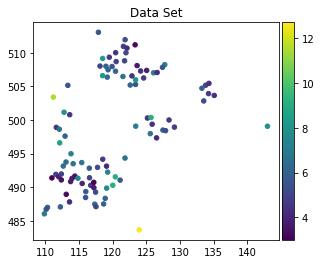

In [7]:
if graphics:
    ax = gp.point(mydb,color_name="Pb",title="Data Set")

## Variograms

We first define the geometry of the variogram calculations

In [8]:
myVarioParamOmni = gl.VarioParam()
mydir = gl.DirParam.create(ndim=2, npas=10, dpas=1.)
myVarioParamOmni.addDir(mydir)

We use the variogram definition in order to calculate the variogram cloud.

In [9]:
dbcloud = gl.db_variogram_cloud(mydb, myVarioParamOmni)

We recall that the Variogram cloud is calculated by filling an underlying grid where each cell is painted according to the number of pairs at the given distance and given variability. Representing the variogram cloud

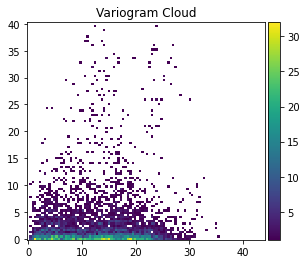

In [10]:
if graphics:
    gp.grid(dbcloud,"Cloud*",title="Variogram Cloud")

Calculating the experimental omni-directional variogram

In [11]:
myVarioOmni = gl.Vario(myVarioParamOmni,mydb)
err = myVarioOmni.compute(gl.ECalcVario.VARIOGRAM)
if verbose:
    myVarioOmni.display()


Variogram characteristics
Number of variable(s)       = 1
Number of direction(s)      = 1
Space dimension             = 2
Variance-Covariance Matrix     2.881

Direction #1
------------
Number of lags              = 10
Direction coefficients      =      1.000     0.000
Direction angles (degrees)  =      0.000     0.000
Tolerance on direction      =     90.000 (degrees)
Calculation lag             =      1.000
Tolerance on distance       =     50.000 (Percent of the lag value)

For variable 1
      Rank    Npairs  Distance     Value
         0     3.000     0.389     0.462
         1   123.000     1.081     1.495
         2   183.000     2.038     1.620
         3   205.000     3.006     2.526
         4   231.000     4.013     2.240
         5   229.000     5.036     2.524
         6   198.000     5.962     2.396
         7   187.000     7.000     2.708
         8   204.000     7.996     2.772
         9   184.000     8.990     2.868
 

The variogram is represented graphically for a quick check

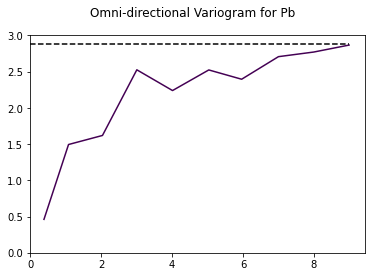

In [12]:
if graphics:
    axs = gp.vario(myVarioOmni,title="Omni-directional Variogram for Pb")

Calculate a variogram in several directions

In [13]:
myvarioParam = gl.VarioParam()
mydirs = gl.DirParam.createMultiple(2, 4, 10, 1.)
myvarioParam.addMultiDirs(mydirs)
myvario = gl.Vario(myvarioParam,mydb)
myvario.compute(gl.ECalcVario.VARIOGRAM)
if verbose:
    myvario.display()


Variogram characteristics
Number of variable(s)       = 1
Number of direction(s)      = 4
Space dimension             = 2
Variance-Covariance Matrix     2.881

Direction #1
------------
Number of lags              = 10
Direction coefficients      =      1.000     0.000
Direction angles (degrees)  =      0.000     0.000
Tolerance on direction      =     22.500 (degrees)
Calculation lag             =      1.000
Tolerance on distance       =     50.000 (Percent of the lag value)

For variable 1
      Rank    Npairs  Distance     Value
         0     1.000     0.410     0.180
         1    29.000     1.094     1.634
         2    47.000     2.079     1.415
         3    53.000     3.003     2.824
         4    63.000     3.999     2.348
         5    66.000     5.035     2.319
         6    60.000     5.978     3.115
         7    52.000     7.045     2.746
         8    52.000     8.020     3.927
         9    37.000     8.980     2.554

Direction #2
------------
Number of lags          

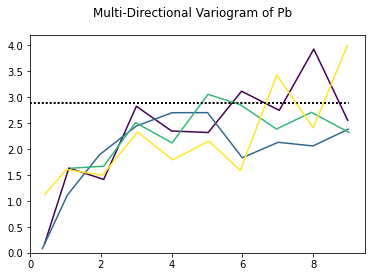

In [14]:
if graphics:
    axs = gp.varmod(myvario,title="Multi-Directional Variogram of Pb")

Calculating the Variogram Map

In [15]:
myvmap = gl.db_vmap_compute(mydb,gl.ECalcVario.VARIOGRAM,[20,20])
if verbose:
    myvmap.display()


Data Base Grid Characteristics

Data Base Summary
-----------------
File is organized as a regular grid
Space dimension              = 2
Number of Columns            = 5
Maximum Number of UIDs       = 5
Total number of samples      = 1681

Grid characteristics:
---------------------
Origin :    -33.160   -29.380
Mesh   :      1.658     1.469
Number :         41        41

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = x1 - Locator = x1
Column = 2 - Name = x2 - Locator = x2
Column = 3 - Name = VMAP.Pb.Var - Locator = z1
Column = 4 - Name = VMAP.Pb.Nb - Locator = NA
 

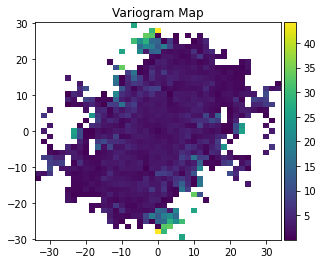

In [16]:
if graphics:
    gp.grid(myvmap,"*Var",title="Variogram Map")

## Model

Fitting a Model. We call the Automatic Fitting procedure providing the list of covariance functions to be tested.

In [17]:
mymodel = gl.Model.createFromDb(mydb)
err = mymodel.fit(myvario,[gl.ECov.EXPONENTIAL,gl.ECov.SPHERICAL])

Visualizing the resulting model, overlaid on the experimental variogram

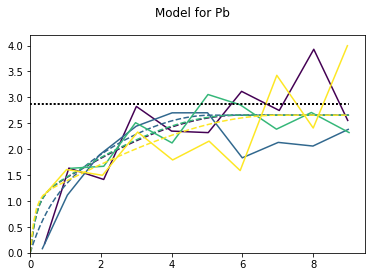

In [18]:
if graphics:
    axs = gp.varmod(myvario,mymodel,title="Model for Pb")

### Model with equality constraints 

We can impose some constraints on the parameters during the fit. For instance here, we impose an equality constraint on the range (range = 1).

In [19]:
myModelConstrained = gl.Model.createFromDb(mydb)
constr = gl.Constraints()
paramid = gl.CovParamId(0,0,gl.EConsElem.RANGE,0,0)
constr.addItem(gl.ConsItem(paramid,gl.EConsType.EQUAL,1.))
opt = gl.Option_AutoFit()
err = myModelConstrained.fit(myVarioOmni,[gl.ECov.SPHERICAL],False,opt,constr)
myModelConstrained


Model characteristics
Space dimension              = 2
Number of variable(s)        = 1
Number of basic structure(s) = 1
Number of drift function(s)  = 0
Number of drift equation(s)  = 0

Covariance Part
---------------
Spherical
- Sill         =      2.101
- Range        =      1.000
Total Sill     =      2.101

We can impose inequality constraints by using **EConsType.LOWER** or **EConsType.UPPER**.

## Adding a drift

In [20]:
mymodel.addDrift(gl.Drift1(mymodel.getContext()))
if verbose:
    mymodel.display()


Model characteristics
Space dimension              = 2
Number of variable(s)        = 1
Number of basic structure(s) = 2
Number of drift function(s)  = 1
Number of drift equation(s)  = 1

Covariance Part
---------------
Exponential
- Sill         =      1.035
- Ranges       =      1.786     0.366
- Theo. Ranges =      0.596     0.122
- Angles       =    405.023     0.000
- Rotation Matrix
               [,  0]    [,  1]
     [  0,]     0.707    -0.707
     [  1,]     0.707     0.707
Spherical
- Sill         =      1.621
- Ranges       =      7.051     5.132
- Angles       =   1576.897     0.000
- Rotation Matrix
               [,  0]    [,  1]
     [  0,]    -0.730    -0.683
     [  1,]     0.683    -0.730
Total Sill     =      2.656

Drift Part
----------
Universality Condition
 

## Defining the Neighborhood

We initiate a Neigborhood (Moving with a small number of samples for Demonstration)

In [21]:
myneigh = gl.NeighMoving.create(ndim=2,flag_xvalid=False,nmaxi=6,radius=10)
if verbose:
    myneigh.display()


Moving Neighborhood
Space dimension = 2
Minimum number of samples           = 1
Maximum number of samples           = 6
Maximum horizontal distance         = 10
 

## Checking the Moving Neighborhood

We must first create a Grid which covers the area of interest

In [22]:
mygrid = gl.DbGrid.createCoveringDb(mydb,[],[0.5,0.5],[],[2,2])
if verbose:
    mygrid.display()


Data Base Grid Characteristics

Data Base Summary
-----------------
File is organized as a regular grid
Space dimension              = 2
Number of Columns            = 2
Maximum Number of UIDs       = 2
Total number of samples      = 5760

Grid characteristics:
---------------------
Origin :    107.850   481.660
Mesh   :      0.500     0.500
Number :         80        72

Variables
---------
Column = 0 - Name = x1 - Locator = x1
Column = 1 - Name = x2 - Locator = x2
 

We can now test the neighborhood characteristics for each node of the previously defined grid.

In [23]:
err = gl.test_neigh(mydb,mygrid,mymodel,myneigh)
if verbose:
    mygrid.display()


Data Base Grid Characteristics

Data Base Summary
-----------------
File is organized as a regular grid
Space dimension              = 2
Number of Columns            = 7
Maximum Number of UIDs       = 7
Total number of samples      = 5760

Grid characteristics:
---------------------
Origin :    107.850   481.660
Mesh   :      0.500     0.500
Number :         80        72

Variables
---------
Column = 0 - Name = x1 - Locator = x1
Column = 1 - Name = x2 - Locator = x2
Column = 2 - Name = Neigh.Pb.Number - Locator = NA
Column = 3 - Name = Neigh.Pb.MaxDist - Locator = NA
Column = 4 - Name = Neigh.Pb.MinDist - Locator = NA
Column = 5 - Name = Neigh.Pb.NbNESect - Locator = NA
Column = 6 - Name = Neigh.Pb.NbCESect - Locator = z1
 

We can visualize some of the newly created variables, such as:


- the number of points per neighborhood

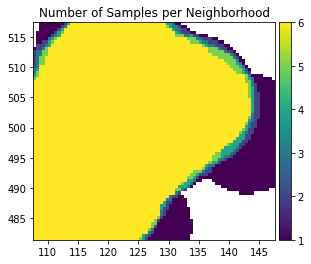

In [24]:
if graphics:
    gp.grid(mygrid,"Neigh*Number",title="Number of Samples per Neighborhood")

- the one giving the maximum distance per neighborhood

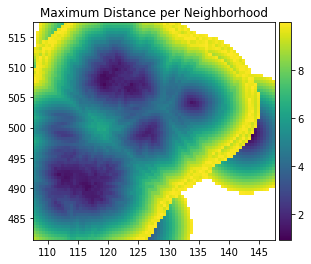

In [25]:
if graphics:
    gp.grid(mygrid,"Neigh*MaxDist",title="Maximum Distance per Neighborhood")

## Cross-validation

We can now process the cross-validation step

In [26]:
err = gl.xvalid(mydb,mymodel,myneigh)
if verbose:
    mydb.display()


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of Columns            = 8
Maximum Number of UIDs       = 8
Total number of samples      = 102
Number of active samples     = 99

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = X - Locator = x1
Column = 2 - Name = Y - Locator = x2
Column = 3 - Name = Zn - Locator = NA
Column = 4 - Name = Pb - Locator = NA
Column = 5 - Name = sel - Locator = sel
Column = 6 - Name = Xvalid.Pb.esterr - Locator = z1
Column = 7 - Name = Xvalid.Pb.stderr - Locator = NA
 

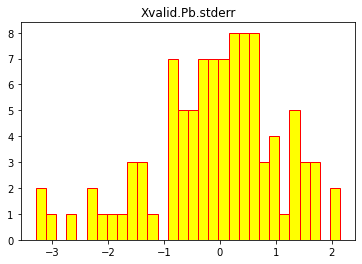

In [27]:
if graphics:
    ax = gp.hist(mydb,"Xvalid.Pb.stderr")

## Estimation by Kriging

We now perform the Estimation by Ordinary Kriging. The Neighborhood is changed into a Unique Neighborhood.

In [28]:
mydb.setLocator("Pb",gl.ELoc.Z)
myneigh = gl.NeighUnique.create(2)
err = gl.kriging(mydb,mygrid,mymodel,myneigh)
if verbose:
    mygrid.display()


Data Base Grid Characteristics

Data Base Summary
-----------------
File is organized as a regular grid
Space dimension              = 2
Number of Columns            = 9
Maximum Number of UIDs       = 9
Total number of samples      = 5760

Grid characteristics:
---------------------
Origin :    107.850   481.660
Mesh   :      0.500     0.500
Number :         80        72

Variables
---------
Column = 0 - Name = x1 - Locator = x1
Column = 1 - Name = x2 - Locator = x2
Column = 2 - Name = Neigh.Pb.Number - Locator = NA
Column = 3 - Name = Neigh.Pb.MaxDist - Locator = NA
Column = 4 - Name = Neigh.Pb.MinDist - Locator = NA
Column = 5 - Name = Neigh.Pb.NbNESect - Locator = NA
Column = 6 - Name = Neigh.Pb.NbCESect - Locator = NA
Column = 7 - Name = Kriging.Pb.estim - Locator = z1
Column = 8 - Name = Kriging.Pb.stdev - Locator = NA
 

Visualizing the results

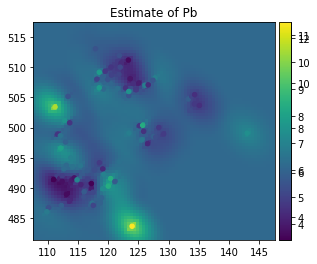

In [29]:
if graphics:
    ax = gp.grid(mygrid,"Kriging.Pb.estim")
    ax = gp.point(mydb,"Pb",title="Estimate of Pb",ax=ax)

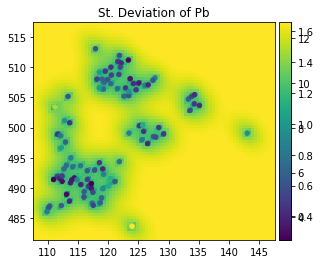

In [30]:
if graphics:
    ax = gp.grid(mygrid,"Kriging.Pb.stdev")
    ax = gp.point(mydb,"Pb",title="St. Deviation of Pb",ax=ax)

## Simulations

We must first transform the Data into Gaussian

In [31]:
myanamPb = gl.AnamHermite(30)
myanamPb.fit(mydb)
if verbose:
    myanamPb.display()


Hermitian Anamorphosis
----------------------
Minimum absolute value for Y  = -2.7
Maximum absolute value for Y  = 2.6
Minimum absolute value for Z  = 3.0029
Maximum absolute value for Z  = 12.9777
Minimum practical value for Y = -2.7
Maximum practical value for Y = 2.6
Minimum practical value for Z = 3.0029
Maximum practical value for Z = 12.9777
Mean                          = 5.65758
Variance                      = 2.86296
Number of Hermite polynomials = 30
Normalized coefficients for Hermite polynomials
               [,  0]    [,  1]    [,  2]    [,  3]    [,  4]    [,  5]    [,  6]
     [  0,]     5.658    -1.625     0.440    -0.069    -0.017     0.082    -0.061
     [  7,]     0.001     0.036    -0.044     0.004     0.047    -0.030    -0.029
     [ 14,]     0.037     0.007    -0.031     0.010     0.018    -0.019    -0.003
     [ 21,]     0.019    -0.010    -0.014     0.019     0.006    -0.023     0.004
     [ 28,]     0.022    -0.013
 

We can produce the Gaussian Anamorphosis graphically within its definition domain.

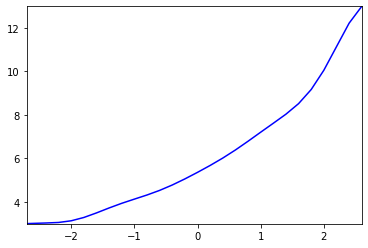

In [32]:
if graphics:
    ax = gp.anam(myanamPb)

The next step consists in translating the target variable ('Pb') into its Gaussian transform

In [33]:
mydb.setLocator("Pb",gl.ELoc.Z)
err = gl.RawToGaussianByLocator(mydb, myanamPb)
if verbose:
    mydb.display()


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of Columns            = 9
Maximum Number of UIDs       = 9
Total number of samples      = 102
Number of active samples     = 99

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = X - Locator = x1
Column = 2 - Name = Y - Locator = x2
Column = 3 - Name = Zn - Locator = NA
Column = 4 - Name = Pb - Locator = NA
Column = 5 - Name = sel - Locator = sel
Column = 6 - Name = Xvalid.Pb.esterr - Locator = NA
Column = 7 - Name = Xvalid.Pb.stderr - Locator = NA
Column = 8 - Name = Y.Pb - Locator = z1
 

We quickly calculate experimental (omni-directional) variograms using the already defined directions

In [34]:
myvarioParam = gl.VarioParam()
mydir = gl.DirParam(2,10,1.)
myvarioParam.addDir(mydir)
myVario = gl.Vario(myvarioParam,mydb)
err = myvario.compute(gl.ECalcVario.VARIOGRAM)

We fit the model by automatic fit (with the constraints that the total sill be equal to 1).

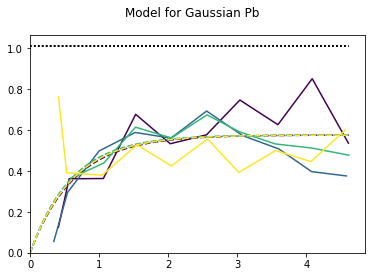

In [35]:
mymodelG = gl.Model.createFromDb(mydb)
err = mymodelG.fit(myvario,[gl.ECov.EXPONENTIAL])
if graphics:
    ax = gp.varmod(myvario,mymodelG,title="Model for Gaussian Pb")

We perform a set of 10 conditional simulations using the Turning Bands Method.

In [36]:
err = gl.simtub(mydb,mygrid,mymodel,myneigh,10)
if verbose:
    mygrid.display()


Data Base Grid Characteristics

Data Base Summary
-----------------
File is organized as a regular grid
Space dimension              = 2
Number of Columns            = 19
Maximum Number of UIDs       = 19
Total number of samples      = 5760

Grid characteristics:
---------------------
Origin :    107.850   481.660
Mesh   :      0.500     0.500
Number :         80        72

Variables
---------
Column = 0 - Name = x1 - Locator = x1
Column = 1 - Name = x2 - Locator = x2
Column = 2 - Name = Neigh.Pb.Number - Locator = NA
Column = 3 - Name = Neigh.Pb.MaxDist - Locator = NA
Column = 4 - Name = Neigh.Pb.MinDist - Locator = NA
Column = 5 - Name = Neigh.Pb.NbNESect - Locator = NA
Column = 6 - Name = Neigh.Pb.NbCESect - Locator = NA
Column = 7 - Name = Kriging.Pb.estim - Locator = NA
Column = 8 - Name = Kriging.Pb.stdev - Locator = NA
Column = 9 - Name = Simu.Y.Pb.1 - Locator = z1
Column = 10 - Name = Simu.Y.Pb.2 - Locator = z2
Column = 11 - Name = Simu.Y.Pb.3 - Locator = z3
Column = 12 - Name

Some statistics on the Conditional simulations in Gaussian scale

In [37]:
if verbose:
    err = mygrid.statistics(["Simu.Y.*"],[gl.EStatOption.MINI, gl.EStatOption.MAXI, gl.EStatOption.MEAN, gl.EStatOption.STDV],
                            True,True,True)

                 MINI      MAXI      MEAN      STDV
Simu.Y.Pb.1      -5.638     6.293     0.126     1.578
Simu.Y.Pb.2      -5.437     7.185     0.456     1.603
Simu.Y.Pb.3      -7.024     6.249    -0.202     1.651
Simu.Y.Pb.4      -5.573     6.267     0.668     1.576
Simu.Y.Pb.5      -5.216     6.403     0.615     1.622
Simu.Y.Pb.6      -5.677     6.429     0.223     1.659
Simu.Y.Pb.7      -4.521     6.670     0.812     1.648
Simu.Y.Pb.8      -4.898     6.028     0.567     1.645
Simu.Y.Pb.9      -4.897     6.487     0.204     1.549
Simu.Y.Pb.10     -5.901     6.146    -0.109     1.571
 

We visualize a conditional simulation in Gaussian scale

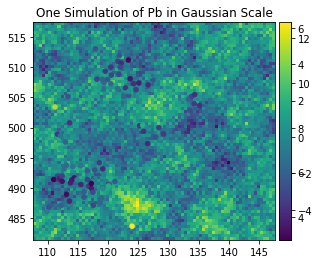

In [38]:
if graphics:
    ax = gp.grid(mygrid,"Simu.Y.Pb.1")
    ax = gp.point(mydb,"Pb",title="One Simulation of Pb in Gaussian Scale",ax=ax)

We turn the Gaussian conditional simulations into Raw scale (using the Anamorphosis back transform) and get rid of the Gaussian conditional simulations.

In [39]:
gl.GaussianToRaw(mygrid,myanamPb,"Simu.Y.*")
mygrid.deleteColumn("Simu.Y.*")
if verbose:
    mygrid.display()


Data Base Grid Characteristics

Data Base Summary
-----------------
File is organized as a regular grid
Space dimension              = 2
Number of Columns            = 19
Maximum Number of UIDs       = 29
Total number of samples      = 5760

Grid characteristics:
---------------------
Origin :    107.850   481.660
Mesh   :      0.500     0.500
Number :         80        72

Variables
---------
Column = 0 - Name = x1 - Locator = x1
Column = 1 - Name = x2 - Locator = x2
Column = 2 - Name = Neigh.Pb.Number - Locator = NA
Column = 3 - Name = Neigh.Pb.MaxDist - Locator = NA
Column = 4 - Name = Neigh.Pb.MinDist - Locator = NA
Column = 5 - Name = Neigh.Pb.NbNESect - Locator = NA
Column = 6 - Name = Neigh.Pb.NbCESect - Locator = NA
Column = 7 - Name = Kriging.Pb.estim - Locator = NA
Column = 8 - Name = Kriging.Pb.stdev - Locator = NA
Column = 9 - Name = Z.Simu.Y.Pb.1 - Locator = z1
Column = 10 - Name = Z.Simu.Y.Pb.2 - Locator = z2
Column = 11 - Name = Z.Simu.Y.Pb.3 - Locator = z3
Column = 12 

We calculate some statistics on the Conditional Simulations in Raw scale.

In [40]:
if verbose:
    err = mygrid.statistics(["Z.Simu.*"],[gl.EStatOption.MINI, gl.EStatOption.MAXI, gl.EStatOption.MEAN, gl.EStatOption.STDV],
                            True,True,True)

                 MINI      MAXI      MEAN      STDV
Z.Simu.Y.Pb.1      -2.700     0.550    -2.658     0.255
Z.Simu.Y.Pb.2      -2.700     0.991    -2.630     0.321
Z.Simu.Y.Pb.3      -2.700     0.526    -2.674     0.189
Z.Simu.Y.Pb.4      -2.700     0.536    -2.611     0.352
Z.Simu.Y.Pb.5      -2.700     0.607    -2.609     0.372
Z.Simu.Y.Pb.6      -2.700     0.620    -2.644     0.291
Z.Simu.Y.Pb.7      -2.700     0.741    -2.577     0.439
Z.Simu.Y.Pb.8      -2.700     0.405    -2.606     0.376
Z.Simu.Y.Pb.9      -2.700     0.650    -2.659     0.243
Z.Simu.Y.Pb.10     -2.700     0.471    -2.675     0.180
 

We visualize a Conditional Simulation in Raw Scale

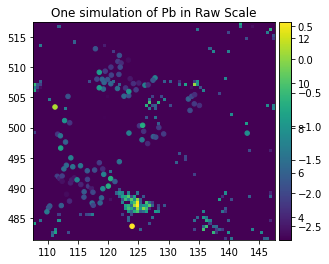

In [41]:
if graphics:
    ax = gp.grid(mygrid,"Z.Simu.Y.Pb.1")
    ax = gp.point(mydb,"Pb",title="One simulation of Pb in Raw Scale", ax=ax)

Let us now average the conditional simulations in order to have a comparison with the estimation by kriging.

In [42]:
err = mygrid.statistics(["Z.Simu.*"],[gl.EStatOption.MEAN],True,False,False)
if verbose:
    mygrid.display()


Data Base Grid Characteristics

Data Base Summary
-----------------
File is organized as a regular grid
Space dimension              = 2
Number of Columns            = 20
Maximum Number of UIDs       = 30
Total number of samples      = 5760

Grid characteristics:
---------------------
Origin :    107.850   481.660
Mesh   :      0.500     0.500
Number :         80        72

Variables
---------
Column = 0 - Name = x1 - Locator = x1
Column = 1 - Name = x2 - Locator = x2
Column = 2 - Name = Neigh.Pb.Number - Locator = NA
Column = 3 - Name = Neigh.Pb.MaxDist - Locator = NA
Column = 4 - Name = Neigh.Pb.MinDist - Locator = NA
Column = 5 - Name = Neigh.Pb.NbNESect - Locator = NA
Column = 6 - Name = Neigh.Pb.NbCESect - Locator = NA
Column = 7 - Name = Kriging.Pb.estim - Locator = NA
Column = 8 - Name = Kriging.Pb.stdev - Locator = NA
Column = 9 - Name = Z.Simu.Y.Pb.1 - Locator = NA
Column = 10 - Name = Z.Simu.Y.Pb.2 - Locator = NA
Column = 11 - Name = Z.Simu.Y.Pb.3 - Locator = NA
Column = 12 

Displaying the average of the Conditional Simulations

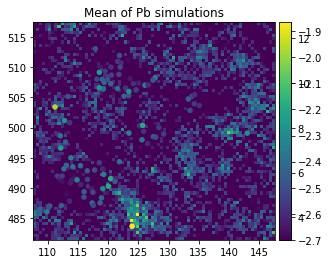

In [43]:
if graphics:
    ax = gp.grid(mygrid,"Stats*MEAN")
    ax = gp.point(mydb,"Pb",title="Mean of Pb simulations",ax=ax)

## Multivariate case

The Gaussian transform of the Pb variable has already been calculated. It suffices to perform the Gaussian transform of the Zn variable

In [44]:
mydb.setLocator("Zn",gl.ELoc.Z)
myanamZn = gl.AnamHermite(30)
myanamZn.fit(mydb)
if verbose:
    myanamZn.display()


Hermitian Anamorphosis
----------------------
Minimum absolute value for Y  = -2.5
Maximum absolute value for Y  = 2.6
Minimum absolute value for Z  = 1.1469
Maximum absolute value for Z  = 12.1276
Minimum practical value for Y = -2.5
Maximum practical value for Y = 2.6
Minimum practical value for Z = 1.1469
Maximum practical value for Z = 12.1276
Mean                          = 2.88061
Variance                      = 2.76263
Number of Hermite polynomials = 30
Normalized coefficients for Hermite polynomials
               [,  0]    [,  1]    [,  2]    [,  3]    [,  4]    [,  5]    [,  6]
     [  0,]     2.881    -1.277     0.877    -0.447    -0.095     0.294    -0.121
     [  7,]    -0.087     0.134    -0.029    -0.087     0.069     0.034    -0.065
     [ 14,]     0.005     0.044    -0.026    -0.020     0.034     0.001    -0.033
     [ 21,]     0.010     0.027    -0.016    -0.019     0.016     0.012    -0.014
     [ 28,]    -0.005     0.011
 

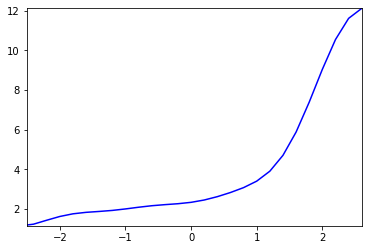

In [45]:
if graphics:
    ax = gp.anam(myanamZn)

We convert the raw data into its Gaussian equivalent

In [46]:
mydb.setLocator("Zn",gl.ELoc.Z)
err = gl.RawToGaussianByLocator(mydb, myanamZn)
if verbose:
    mydb.display()


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of Columns            = 10
Maximum Number of UIDs       = 20
Total number of samples      = 102
Number of active samples     = 99

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = X - Locator = x1
Column = 2 - Name = Y - Locator = x2
Column = 3 - Name = Zn - Locator = NA
Column = 4 - Name = Pb - Locator = NA
Column = 5 - Name = sel - Locator = sel
Column = 6 - Name = Xvalid.Pb.esterr - Locator = NA
Column = 7 - Name = Xvalid.Pb.stderr - Locator = NA
Column = 8 - Name = Y.Pb - Locator = NA
Column = 9 - Name = Y.Zn - Locator = z1
 

We now perform the multivariate variogram caculation

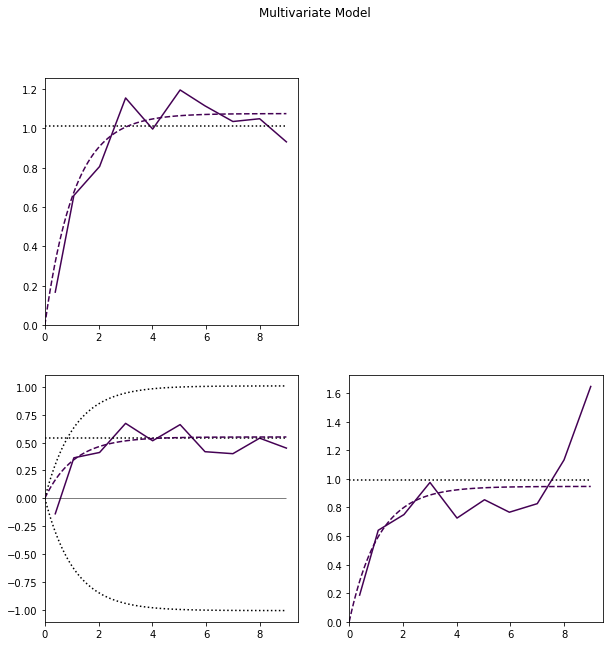

In [47]:
mydb.setLocators(["Y.Pb","Y.Zn"],gl.ELoc.Z)
myvario = gl.Vario(myvarioParam,mydb)
err = myvario.compute(gl.ECalcVario.VARIOGRAM)
mymodelM = gl.Model.createFromDb(mydb)
err = mymodelM.fit(myvario,[gl.ECov.EXPONENTIAL])
if graphics:
    ax = gp.varmod(myvario,mymodelM,title="Multivariate Model",figsize=[5,5])

We perform 10 bivariate conditional simulations (deleting the previous monovariate simulation outcomes first for better legibility)

In [48]:
mygrid.deleteColumn("Z.Simu*")
err = gl.simtub(mydb,mygrid,mymodelM,myneigh,10)
if verbose:
    mygrid.display()


Data Base Grid Characteristics

Data Base Summary
-----------------
File is organized as a regular grid
Space dimension              = 2
Number of Columns            = 30
Maximum Number of UIDs       = 50
Total number of samples      = 5760

Grid characteristics:
---------------------
Origin :    107.850   481.660
Mesh   :      0.500     0.500
Number :         80        72

Variables
---------
Column = 0 - Name = x1 - Locator = x1
Column = 1 - Name = x2 - Locator = x2
Column = 2 - Name = Neigh.Pb.Number - Locator = NA
Column = 3 - Name = Neigh.Pb.MaxDist - Locator = NA
Column = 4 - Name = Neigh.Pb.MinDist - Locator = NA
Column = 5 - Name = Neigh.Pb.NbNESect - Locator = NA
Column = 6 - Name = Neigh.Pb.NbCESect - Locator = NA
Column = 7 - Name = Kriging.Pb.estim - Locator = NA
Column = 8 - Name = Kriging.Pb.stdev - Locator = NA
Column = 9 - Name = Stats.MEAN - Locator = NA
Column = 10 - Name = Simu.Y.Pb.1 - Locator = z1
Column = 11 - Name = Simu.Y.Pb.2 - Locator = z2
Column = 12 - Name 

We back-transform each set of simulation outcomes using its own Gaussian Anamorphosis function. Finally we delete the Gaussian variables and ask for the statistics on the simulated variables in the Raw Scale.

In [49]:
err = gl.GaussianToRaw(mygrid,myanamZn,"Simu.Y.Zn*")
err = gl.GaussianToRaw(mygrid,myanamPb,"Simu.Y.Pb*")
mygrid.deleteColumn("Simu.Y*")
if verbose:
    err = mygrid.statistics(["Z.Simu.*"],[gl.EStatOption.MINI, gl.EStatOption.MAXI, gl.EStatOption.MEAN, gl.EStatOption.STDV],
                            True,True,True)

                 MINI      MAXI      MEAN      STDV
Z.Simu.Y.Zn.1      -2.500     1.018    -2.417     0.358
Z.Simu.Y.Zn.2      -2.500     1.080    -2.434     0.315
Z.Simu.Y.Zn.3      -2.500     1.014    -2.396     0.421
Z.Simu.Y.Zn.4      -2.500     0.977    -2.421     0.356
Z.Simu.Y.Zn.5      -2.500     0.948    -2.412     0.361
Z.Simu.Y.Zn.6      -2.500     0.721    -2.401     0.374
Z.Simu.Y.Zn.7      -2.500     1.064    -2.412     0.375
Z.Simu.Y.Zn.8      -2.500     0.709    -2.413     0.354
Z.Simu.Y.Zn.9      -2.500     0.872    -2.418     0.355
Z.Simu.Y.Zn.10     -2.500     1.056    -2.411     0.367
Z.Simu.Y.Pb.1      -2.700    -1.245    -2.699     0.035
Z.Simu.Y.Pb.2      -2.700    -1.634    -2.699     0.034
Z.Simu.Y.Pb.3      -2.700    -1.357    -2.699     0.036
Z.Simu.Y.Pb.4      -2.700    -1.544    -2.699     0.030
Z.Simu.Y.Pb.5      -2.700    -0.486    -2.698     0.056
Z.Simu.Y.Pb.6      -2.700    -1.402    -2.699     0.027
Z.Simu.Y.Pb.7      -2.700    -1.641    -2.699     0.

## Categorical Variable

We compare the initial variable 'Pb' with a set of disjoint intervals. The 'Pb' values varying from 3 to 12.7, we consider three classes:
- values below 4
- values between 4 and 6
- values above 6


We first build the indicators for each class

In [50]:
limits = gl.Limits([np.nan, 4., 6., np.nan])
if verbose:
    limits.display()

Bound( 1 ) : ] -Inf ; 4 [
Bound( 2 ) : [ 4 ; 6 [
Bound( 3 ) : [ 6 ;  +Inf [
 

We apply the set of limits previously defined in order to transform the input variable into Indicators of the different classes.

In [51]:
err = limits.toIndicator(mydb,"Pb")
if verbose:
    mydb.display()


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of Columns            = 13
Maximum Number of UIDs       = 43
Total number of samples      = 102
Number of active samples     = 99

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = X - Locator = x1
Column = 2 - Name = Y - Locator = x2
Column = 3 - Name = Zn - Locator = NA
Column = 4 - Name = Pb - Locator = NA
Column = 5 - Name = sel - Locator = sel
Column = 6 - Name = Xvalid.Pb.esterr - Locator = NA
Column = 7 - Name = Xvalid.Pb.stderr - Locator = NA
Column = 8 - Name = Y.Pb - Locator = NA
Column = 9 - Name = Y.Zn - Locator = NA
Column = 10 - Name = Indicator.Pb.Class.1 - Locator = z1
Column = 11 - Name = Indicator.Pb.Class.2 - Locator = z2
Column = 12 - Name = Indicator.Pb.Class.3 - Locator = z3
 

We calculate the variogram of the Indicators for future use

In [52]:
myvarioindParam = gl.VarioParam()
myvarioindParam.addDir(mydir)
myvarioInd = gl.Vario(myvarioindParam,mydb)
err = myvarioInd.compute(gl.ECalcVario.VARIOGRAM)
if verbose:
    myvarioInd.display()


Variogram characteristics
Number of variable(s)       = 3
Number of direction(s)      = 1
Space dimension             = 2
Variance-Covariance Matrix
               [,  0]    [,  1]    [,  2]
     [  0,]     0.107    -0.062    -0.044
     [  1,]    -0.062     0.250    -0.187
     [  2,]    -0.044    -0.187     0.231

Direction #1
------------
Number of lags              = 10
Direction coefficients      =      1.000     0.000
Direction angles (degrees)  =      0.000     0.000
Tolerance on direction      =     90.000 (degrees)
Calculation lag             =      1.000
Tolerance on distance       =     50.000 (Percent of the lag value)

For variable 1
      Rank    Npairs  Distance     Value
         0     3.000     0.389     0.000
         1   123.000     1.081     0.081
         2   183.000     2.038     0.126
         3   205.000     3.006     0.156
         4   231.000     4.013     0.132
         5   229.000     5.036     0.159
         6   198.000     5.962     0.152
         7   187

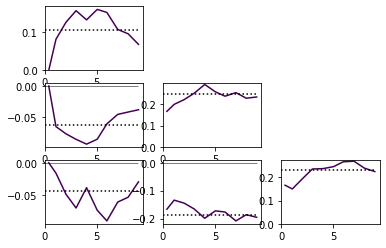

In [53]:
ax = gp.varmod(myvarioInd)

Then we build a categorical variable which gives the index of the class to which each sample belongs

In [54]:
err = limits.toCategory(mydb,"Pb")
if verbose:
    dbfmt = gl.DbStringFormat()
    dbfmt.setFlags(flag_stats=True)
    dbfmt.setNames(["Category*"])
    dbfmt.setMode(2)
    mydb.display(dbfmt)


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of Columns            = 14
Maximum Number of UIDs       = 44
Total number of samples      = 102
Number of active samples     = 99

Data Base Statistics
--------------------
14 - Name Category.Pb - Locator z1
 Nb of data          =        102
 Nb of active values =         99
 Class         1 =         12 (    12.121%)
 Class         2 =         51 (    51.515%)
 Class         3 =         36 (    36.364%)

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = X - Locator = x1
Column = 2 - Name = Y - Locator = x2
Column = 3 - Name = Zn - Locator = NA
Column = 4 - Name = Pb - Locator = NA
Column = 5 - Name = sel - Locator = sel
Column = 6 - Name = Xvalid.Pb.esterr - Locator = NA
Column = 7 - Name = Xvalid.Pb.stderr - Locator = NA
Column = 8 - Name = Y.Pb - Locator = NA
Column = 9 - Name = Y.Zn - Locator = NA
Column 